## PartA: Exploratory Data Analysis (EDA) & Preprocessing [10 points]

### Load and Prepare the Dataset: [3], Initial Analysis: [2]

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
mushroom_csv_url = "/kaggle/input/mushroom-classification/mushrooms.csv"
df = pd.read_csv(mushroom_csv_url)
print("Mushroom dataset shape:", df.shape)
display(df.head(3))

Mushroom dataset shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [85]:
# Basic summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [86]:
# Count of NaN values in each col
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [87]:
# Data type of each column
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

<Axes: ylabel='count'>

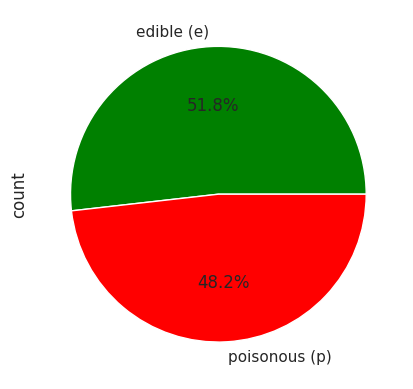

In [88]:
# Target class distribution
df['class'].value_counts().plot.pie(
    labels=['edible (e)', 'poisonous (p)'],
    autopct='%1.1f%%',
    colors=['green', 'red']
)

In [89]:
X = df.drop('class', axis=1)
y = df['class']

print("X shape:", X.shape)
print("y shape:", y.shape)

display(X.head(3))
display(y.head(3))

X shape: (8124, 22)
y shape: (8124,)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m


0    p
1    e
2    e
Name: class, dtype: object

In [90]:
# Converts all categorical columns into OHE
X_encoded = pd.get_dummies(X)
print("X encoded shape:", X_encoded.shape)
display(X_encoded)

X encoded shape: (8124, 117)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [91]:
# Maps target labels 'e' and 'p' to numeric values 1 and 0 for binary classification
y_encoded = y.map({'e': 1, 'p': 0})
print("Y encoded shape:", y_encoded.shape)
display(y_encoded)

Y encoded shape: (8124,)


0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

***Why is one-hot encoding necessary step before applying PCA?***

PCA works only on numerical features, so categorical data must be encoded numerically first. Label encoding the target isn’t needed for PCA but is important for classification tasks after dimensionality reduction.

In [92]:
print("Number of features before OHE:", X.shape[1])
print("Number of features after OHE:", X_encoded.shape[1])

Number of features before OHE: 22
Number of features after OHE: 117


### Standardization [5]

***Why standardizing the one-hot encoded features is still a good practice before PCA, even though they are binary?***

Standardization is essential before applying PCA because PCA is sensitive to the scale of features. Without scaling, features with larger variances  dominate the principal components, biasing the dimensionality reduction. By scaling all features to the same scale, PCA can fairly assess variance contributions and extract meaningful components from the data.

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

## Part B: Principal Component Analysis (PCA) [20 points]

### Apply PCA [2]

In [94]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### Scree Plot & Optimal Components [8]

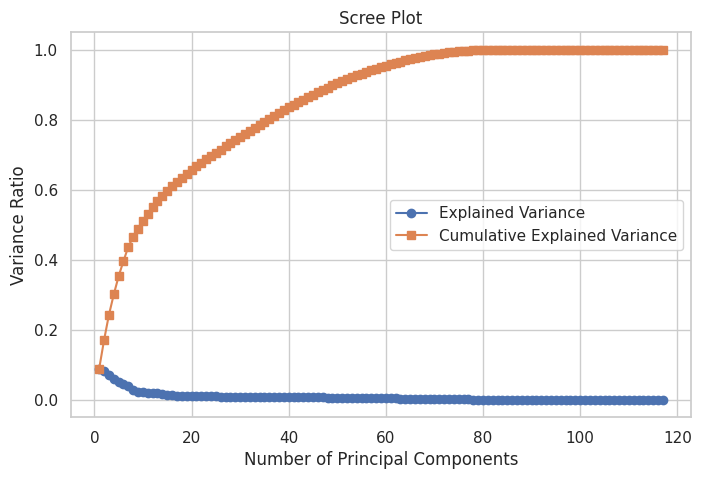

In [95]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='s', label='Cumulative Explained Variance')

plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# the optimal number of principal components to retain is about 95%.
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print("Number of components to retain 95% variance:", n_components_95)

Number of components to retain 95% variance: 59


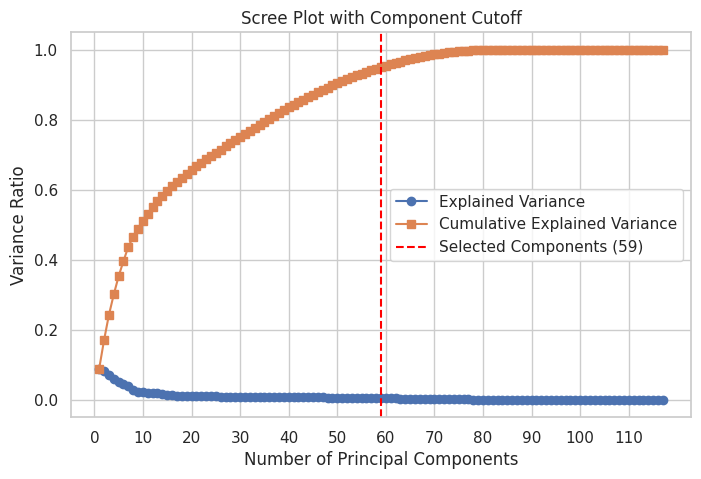

In [97]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='s', label='Cumulative Explained Variance')

plt.axvline(x=59, color='red', linestyle='--', label='Selected Components (59)')
plt.title('Scree Plot with Component Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.xticks(range(0, len(explained_var) + 1, 10))
plt.legend()
plt.grid(True)
plt.show()

***Why only retain to retain 95% variance(59 components)?***

Retaining 95% variance (59 components) ensures that most of the essential patterns in the data are preserved while reducing noise and redundancy. This strikes a practical balance between model performance and efficiency, avoiding overfitting and lowering computational cost without significant loss of information.

### Visualization [10]

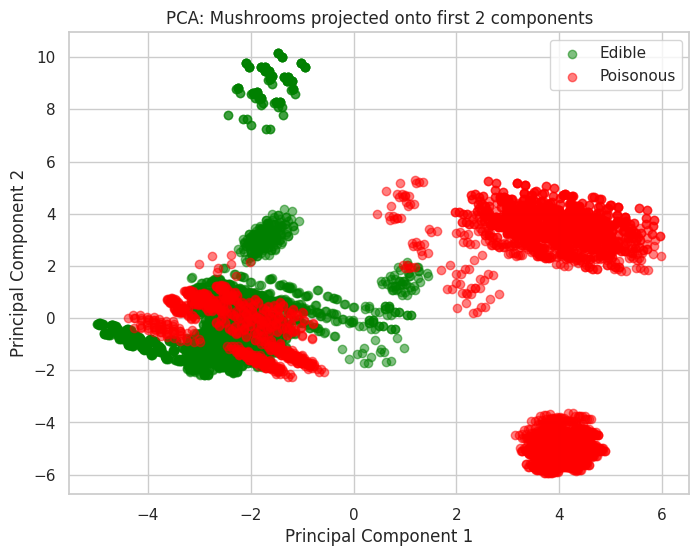

In [98]:
X_pca_2d = X_pca[:, :2]

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_2d[y_encoded == 1, 0], X_pca_2d[y_encoded == 1, 1],
    color='green', label='Edible', alpha=0.5
)
plt.scatter(
    X_pca_2d[y_encoded == 0, 0], X_pca_2d[y_encoded == 0, 1],
    color='red', label='Poisonous', alpha=0.5
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Mushrooms projected onto first 2 components')
plt.legend()
plt.grid(True)
plt.show()

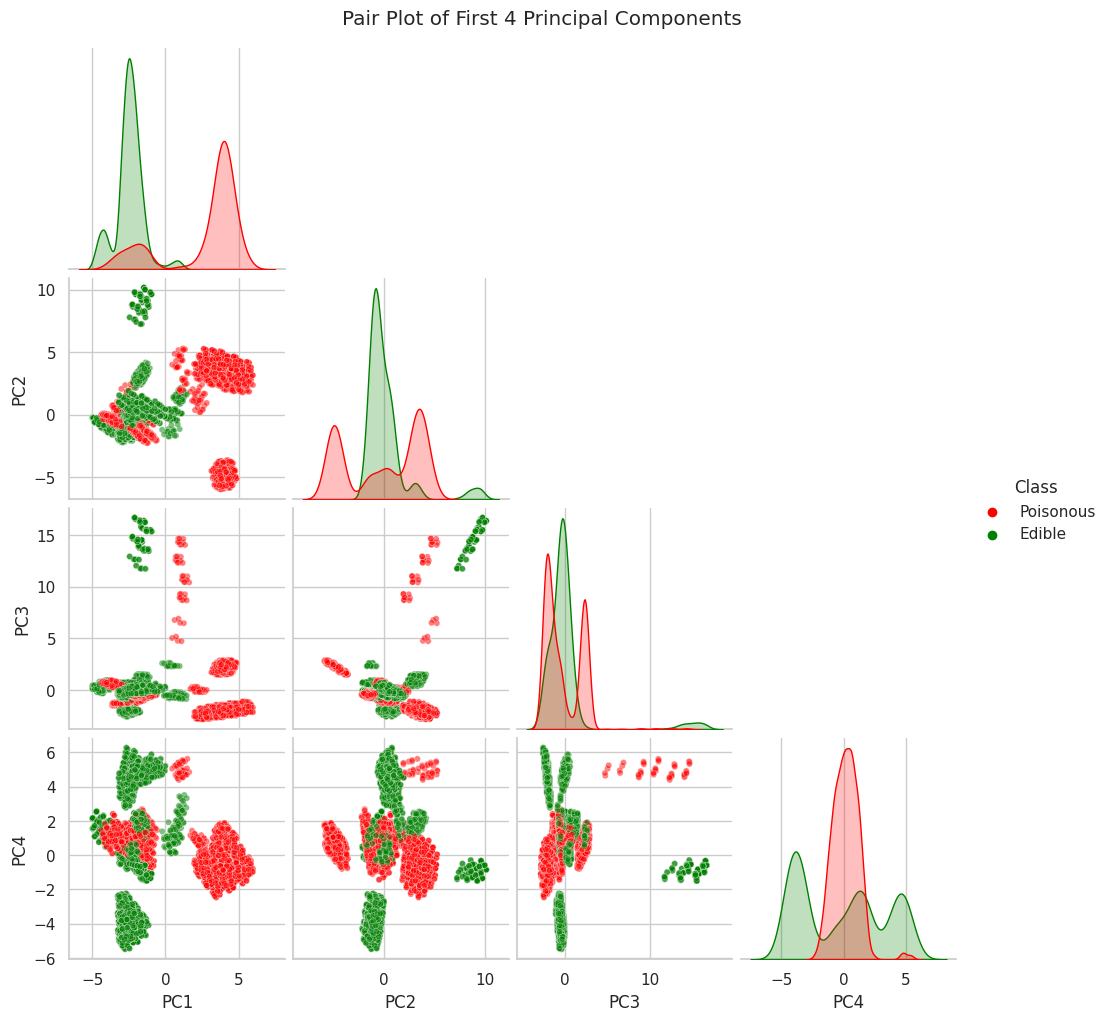

In [99]:
# Convert first 4 PCs to a DataFrame
pca_df = pd.DataFrame(X_pca[:, :4], columns=[f'PC{i+1}' for i in range(4)])
pca_df['Class'] = y_encoded.map({1: 'Edible', 0: 'Poisonous'})

# Set color palette: green for Edible, red for Poisonous
custom_palette = {'Edible': 'green', 'Poisonous': 'red'}

# Create the pair plot
sns.set(style='whitegrid') 
pair_plot = sns.pairplot(
    pca_df,
    hue='Class',
    palette=custom_palette,
    corner=True,
    plot_kws={'alpha': 0.5, 's': 20},
    diag_kws={'fill': True}
)

pair_plot.fig.suptitle('Pair Plot of First 4 Principal Components', y=1.02)
plt.show()

***What can we say about the separability of the two classes in the new, reduced feature space?***

* The scatter plots for the first few principal components show that edible and poisonous mushrooms form mostly distinct clusters, especially in the plots involving PC1 and PC2.

* This indicates that these principal components effectively capture the key differences between the two classes, making them more separable in this reduced space.

* Although some overlap exists, the clear grouping patterns suggest PCA has preserved class-relevant information.

* The kernel density plots on the diagonals highlight that the distribution of scores on individual PCs differs significantly between edible and poisonous mushrooms.

* PCs 3 and 4 contribute additional but less pronounced class separation, reinforcing the idea that several components collectively improve discrimination.

## Part C: Performance Evaluation with Logistic Regression [20 points]

### Baseline Model [5]

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6499, 117)
X_test shape: (1625, 117)
y_train shape: (6499,)
y_test shape: (1625,)


In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [102]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### PCA-Transformed Model [5]

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=59)  # optimal number of determined components
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [104]:
model_pca = LogisticRegression(max_iter=1000, random_state=42)
model_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [106]:
y_pred_pca = model_pca.predict(X_test_pca)
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.2f}")
print(classification_report(y_test, y_pred_pca))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [107]:
from sklearn.metrics import f1_score

# Original data
f1_micro_orig = f1_score(y_test, y_pred, average='micro')
f1_macro_orig = f1_score(y_test, y_pred, average='macro')

# PCA-transformed data
f1_micro_pca = f1_score(y_test, y_pred_pca, average='micro')
f1_macro_pca = f1_score(y_test, y_pred_pca, average='macro')

print(f"Original Data - Micro F1: {f1_micro_orig:.4f}, Macro F1: {f1_macro_orig:.4f}")
print(f"PCA Data - Micro F1: {f1_micro_pca:.4f}, Macro F1: {f1_macro_pca:.4f}")

Original Data - Micro F1: 1.0000, Macro F1: 1.0000
PCA Data - Micro F1: 1.0000, Macro F1: 1.0000


### Comparison and Analysis [10]

Both models achieved perfect performance with **100% accuracy**, precision, recall, and F1-score on the test set. This means:

* **Original data model** and **PCA-transformed model** are equally effective.
* PCA successfully reduced dimensionality **without losing predictive power**.
* PCA helps simplify the data while maintaining classification accuracy, which is great for efficiency and interpretation.

***PCA retains all relevant information for classification here.***

There is **no significant difference** in performance between the two models—both achieved perfect accuracy and classification metrics.

**Why?**

* The dataset likely contains **redundant or correlated features** due to one-hot encoding, which PCA effectively compresses by removing collinearity and redundancy.
* PCA reduces dimensionality while **retaining almost all important variance** (95%+), so minimal information is lost.
* This means the PCA-transformed model has fewer features but retains the key signals, leading to similar performance but with less complexity.

**Benefit of PCA:**

* PCA’s ability to handle feature collinearity helps avoid overfitting and improves computational efficiency without sacrificing accuracy.
* It simplifies the model, making it faster and more interpretable, which is especially useful in large or high-dimensional datasets.

So, PCA provides a great trade-off: **significant dimensionality reduction with no loss in predictive power**.


Using Logistic Regression as a surrogate performance measure for PCA effectiveness is useful because:

* **Simplicity and interpretability:** Logistic Regression is a straightforward, well-understood linear classifier that quickly shows how well PCA preserves class-separating information.
* **Sensitivity to input features:** Its performance directly reflects how much meaningful variance and structure PCA retains in the reduced dataset.
* **Baseline comparison:** Logistic Regression provides a consistent baseline to compare models before and after PCA, highlighting if dimensionality reduction causes information loss.
* **Efficient evaluation:** It’s computationally efficient, enabling rapid experimentation to gauge PCA’s impact without complex modeling.

In short, Logistic Regression effectively assesses whether PCA maintains essential predictive features by measuring classification accuracy and related metrics on transformed data.